In [1]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
import yfinance as yf
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Getting data for the Apple Stock
aapl = yf.Ticker("AAPL")
# Get historical market data
aapl.dataset  = aapl.history(period="max")


In [3]:
# Apple Stocks Information
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [4]:
#Dataframe basic information on rows and columns
aapl.dataset.shape

(10429, 7)

In [5]:
#Dataframe columns
aapl.dataset .columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
# Distrubition of the Divdends
print(aapl.dataset['Dividends'].value_counts())

0.000000    10355
0.001071       21
0.000714        4
0.000893        4
0.000982        4
0.108929        4
0.117500        4
0.130000        4
0.142500        4
0.157500        4
0.182500        4
0.192500        4
0.205000        4
0.220000        4
0.094643        3
0.000536        2
Name: Dividends, dtype: int64


In [7]:
#Distrubition of Stock Splits
print(aapl.dataset['Stock Splits'].value_counts())

0.0    10424
2.0        3
7.0        1
4.0        1
Name: Stock Splits, dtype: int64


In [8]:
# Dropping Divdends and Stock Splits Columns
aapl.dataset.drop(['Dividends', 'Stock Splits'], axis = 1)

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600
...,...,...,...,...,...
2022-04-18,163.919998,166.600006,163.570007,165.070007,69023900
2022-04-19,165.020004,167.820007,163.910004,167.399994,67723800
2022-04-20,168.759995,168.880005,166.100006,167.229996,67929800


In [9]:
#YFinance Bug
aapl.dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [10]:
#YFinance Bug- Dropped columns appears after being dropped so copying into new dataset
dataset = aapl.dataset [['Open', 'Close', 'High', 'Low','Volume']].copy()
dataset.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2022-04-18,163.919998,165.070007,166.600006,163.570007,69023900
2022-04-19,165.020004,167.399994,167.820007,163.910004,67723800
2022-04-20,168.759995,167.229996,168.880005,166.100006,67929800
2022-04-21,168.910004,166.419998,171.529999,165.910004,87227800
2022-04-22,166.460007,161.789993,167.869995,161.500000,84775200


In [11]:
#Columns Finally Dropped
dataset.columns

Index(['Open', 'Close', 'High', 'Low', 'Volume'], dtype='object')

ADDING TECHNICAL INDICATORS TO DATASET

In [12]:
#Stochastic Oscillator Indicator
# Calculating %K and %D
dataset['14-high'] = dataset['High'].rolling(14).max()
dataset['14-low'] = dataset['Low'].rolling(14).min()
dataset['%K'] = (dataset['Close'] - dataset['14-low'])*100/(dataset['14-high'] - dataset['14-low'])
dataset['%D'] = dataset['%K'].rolling(3).mean()


In [13]:
#Dropping 14-HIGH AND 14-LOW COLUMNS
dataset.drop(['14-high', '14-low'], axis = 1, inplace=True)

In [14]:
#Relative Strength Index
#Calculating the RSI

delta = dataset['Close'].diff()
close_up = delta.clip(lower=0)
close_down = -1*delta.clip(upper=0)
ema_up = close_up.ewm(com=13, adjust=False).mean()
ema_down =  close_down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

#Adding RSI Column
dataset['RSI'] = 100 - (100/(1 + rs))

In [15]:
#Bollinger Bands

def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    # SMA for 20 Days (Middle Band)
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()

    # Calculating Upper Band
    bollinger_upper = sma + (std * 2 )

    # Calculate Lower Band
    bollinger_lower = sma - (std * 2 )

    #Middle Band
    bollinger_middle = sma
    return bollinger_upper, bollinger_lower, bollinger_middle


closing_prices = dataset['Close']
bollinger_upper, bollinger_lower, bollinger_middle = get_bollinger_bands(closing_prices)

#Adding Bollinger Bands to the Dataset
dataset['Bollinger_Upper'] = bollinger_upper
dataset['Bollinger_Lower'] = bollinger_lower


In [16]:
#Dataset after Bollinger 
dataset

,Open,Close,High,Low,Volume,%K,%D,RSI,Bollinger_Upper,Bollinger_Lower
Date,,,,,,,,,,
1980-12-12,0.100326,0.100326,0.100762,0.100326,469033600,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.095528,0.095092,0.095528,0.095092,175884800,NaN,NaN,0.000000,NaN,NaN
1980-12-16,0.088548,0.088112,0.088548,0.088112,105728000,NaN,NaN,0.000000,NaN,NaN
1980-12-17,0.090293,0.090293,0.090729,0.090293,86441600,NaN,NaN,3.035482,NaN,NaN
1980-12-18,0.092911,0.092911,0.093347,0.092911,73449600,NaN,NaN,6.696707,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-18,163.919998,165.070007,166.600006,163.570007,69023900,9.351625,15.264859,44.009227,180.788256,162.829748
2022-04-19,165.020004,167.399994,167.820007,163.910004,67723800,23.877732,11.648403,47.682943,180.626370,163.193633
2022-04-20,168.759995,167.229996,168.880005,166.100006,67929800,24.530756,19.253371,47.438378,180.693310,162.967692


In [17]:
# Calculating the MACD Line and the Signal Line
ema12 = dataset['Close'].ewm(span=12, adjust=False).mean()
ema26 = dataset['Close'].ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()


#Appeding the MACD and Signal Data to Dataset
dataset['MACD'] = macd
dataset['Signal'] = signal

In [18]:
#Dataset after MACD
dataset

,Open,Close,High,Low,Volume,%K,%D,RSI,Bollinger_Upper,Bollinger_Lower,MACD,Signal
Date,,,,,,,,,,,,
1980-12-12,0.100326,0.100326,0.100762,0.100326,469033600,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1980-12-15,0.095528,0.095092,0.095528,0.095092,175884800,NaN,NaN,0.000000,NaN,NaN,-0.000418,-0.000084
1980-12-16,0.088548,0.088112,0.088548,0.088112,105728000,NaN,NaN,0.000000,NaN,NaN,-0.001297,-0.000326
1980-12-17,0.090293,0.090293,0.090729,0.090293,86441600,NaN,NaN,3.035482,NaN,NaN,-0.001797,-0.000620
1980-12-18,0.092911,0.092911,0.093347,0.092911,73449600,NaN,NaN,6.696707,NaN,NaN,-0.001959,-0.000888
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,163.919998,165.070007,166.600006,163.570007,69023900,9.351625,15.264859,44.009227,180.788256,162.829748,0.096459,1.280800
2022-04-19,165.020004,167.399994,167.820007,163.910004,67723800,23.877732,11.648403,47.682943,180.626370,163.193633,-0.052764,1.014087
2022-04-20,168.759995,167.229996,168.880005,166.100006,67929800,24.530756,19.253371,47.438378,180.693310,162.967692,-0.182637,0.774742


Exploratory Data Analysis

In [19]:
#Dataset shape after adding all the technical indicators 
dataset.shape

(10429, 12)

In [20]:
#Columns After Adding All The Technical Indicators
dataset.columns

Index(['Open', 'Close', 'High', 'Low', 'Volume', '%K', '%D', 'RSI',
       'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal'],
      dtype='object')

In [21]:
#Information regarding the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10429 entries, 1980-12-12 to 2022-04-22
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             10429 non-null  float64
 1   Close            10429 non-null  float64
 2   High             10429 non-null  float64
 3   Low              10429 non-null  float64
 4   Volume           10429 non-null  int64  
 5   %K               10416 non-null  float64
 6   %D               10414 non-null  float64
 7   RSI              10428 non-null  float64
 8   Bollinger_Upper  10410 non-null  float64
 9   Bollinger_Lower  10410 non-null  float64
 10  MACD             10429 non-null  float64
 11  Signal           10429 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.0 MB


In [22]:
#Summary of Statistics
dataset.describe()

,Open,Close,High,Low,Volume,%K,%D,RSI,Bollinger_Upper,Bollinger_Lower,MACD,Signal
count,10429.000000,10429.000000,10429.000000,10429.000000,1.042900e+04,1.041600e+04,1.041400e+04,10428.000000,10410.000000,10410.000000,10429.000000,10429.000000
mean,13.646545,13.652719,13.795124,13.499010,3.316955e+08,5.476575e+01,5.476760e+01,53.136202,14.363407,12.684386,0.113236,0.113131
std,30.650875,30.669166,31.000602,30.308904,3.391877e+08,3.097330e+01,2.899619e+01,13.147353,32.208398,28.451990,0.677862,0.638607
min,0.038822,0.038385,0.038822,0.038385,0.000000e+00,-2.454631e-13,-4.368779e-14,0.000000,0.048078,0.023337,-4.586029,-3.736176
25%,0.235475,0.235094,0.240330,0.229512,1.243200e+08,2.666690e+01,2.808992e+01,43.521890,0.259429,0.212487,-0.005021,-0.004523
50%,0.387771,0.388534,0.395710,0.380489,2.191784e+08,5.789686e+01,5.788129e+01,52.968955,0.427408,0.348362,0.002986,0.003090
75%,12.294569,12.336771,12.481316,12.206801,4.121712e+08,8.333325e+01,8.141015e+01,62.732369,13.040504,11.451798,0.046856,0.045658
max,182.397624,181.778397,182.707227,178.892080,7.421641e+09,1.000000e+02,9.974569e+01,91.502559,186.083449,169.520649,7.476589,6.870826


In [23]:
#Latest Stock Data in the Dataset
dataset.tail()

,Open,Close,High,Low,Volume,%K,%D,RSI,Bollinger_Upper,Bollinger_Lower,MACD,Signal
Date,,,,,,,,,,,,
2022-04-18,163.919998,165.070007,166.600006,163.570007,69023900,9.351625,15.264859,44.009227,180.788256,162.829748,0.096459,1.280800
2022-04-19,165.020004,167.399994,167.820007,163.910004,67723800,23.877732,11.648403,47.682943,180.626370,163.193633,-0.052764,1.014087
2022-04-20,168.759995,167.229996,168.880005,166.100006,67929800,24.530756,19.253371,47.438378,180.693310,162.967692,-0.182637,0.774742
2022-04-21,168.910004,166.419998,171.529999,165.910004,87227800,19.101818,22.503435,46.221902,180.806599,162.475402,-0.346923,0.550409
2022-04-22,166.460007,161.789993,167.869995,161.500000,84775200,1.706846,15.113140,39.920315,181.107113,160.946886,-0.841028,0.272122


In [24]:
#Start Stock Data in the Dataset
dataset.head()

,Open,Close,High,Low,Volume,%K,%D,RSI,Bollinger_Upper,Bollinger_Lower,MACD,Signal
Date,,,,,,,,,,,,
1980-12-12,0.100326,0.100326,0.100762,0.100326,469033600,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1980-12-15,0.095528,0.095092,0.095528,0.095092,175884800,NaN,NaN,0.000000,NaN,NaN,-0.000418,-0.000084
1980-12-16,0.088548,0.088112,0.088548,0.088112,105728000,NaN,NaN,0.000000,NaN,NaN,-0.001297,-0.000326
1980-12-17,0.090293,0.090293,0.090729,0.090293,86441600,NaN,NaN,3.035482,NaN,NaN,-0.001797,-0.000620
1980-12-18,0.092911,0.092911,0.093347,0.092911,73449600,NaN,NaN,6.696707,NaN,NaN,-0.001959,-0.000888


In [25]:
#Checking for Null Values
dataset.isna().sum()

Open                0
Close               0
High                0
Low                 0
Volume              0
%K                 13
%D                 15
RSI                 1
Bollinger_Upper    19
Bollinger_Lower    19
MACD                0
Signal              0
dtype: int64

In [26]:
#Dropping Null Values
dataset = dataset.dropna()
dataset.isna().sum()

Open               0
Close              0
High               0
Low                0
Volume             0
%K                 0
%D                 0
RSI                0
Bollinger_Upper    0
Bollinger_Lower    0
MACD               0
Signal             0
dtype: int64

In [27]:
#Dataframe shape after dopping null values
dataset.shape

(10410, 12)

In [28]:
#let's check if there is any duplicate data
print(dataset.duplicated().any())
print(dataset.duplicated().sum())

False
0


<AxesSubplot:>

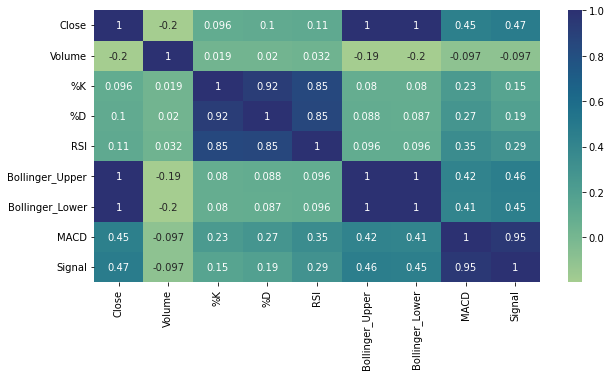

In [29]:
#Plottin Heat Map for Correlation
#Comparing Variables We Want
heatmap = dataset[['Close', 'Volume', '%K', '%D', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal']].copy()
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap.corr(),cmap='crest',annot=True)

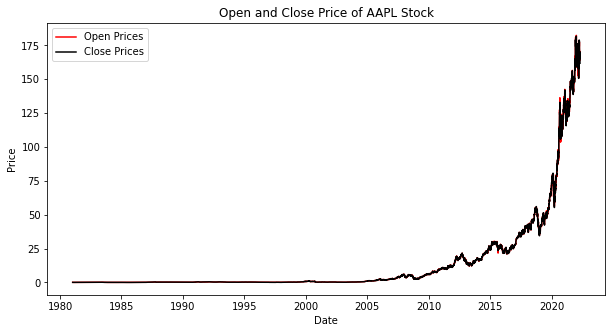

In [41]:
#Plotting Open and Closing Prices of AAPL Stock
plt.figure(figsize=(12, 5))
plt.title("Open and Close Price of AAPL Stock")
plt.plot(dataset['Open'], label='Open Prices', color = 'red')
plt.plot(dataset['Close'],label='Close Prices', color = 'black')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [31]:
# As it is hard to interept the graph becuase the the dataset being too large, we will look at the past 2 years of data

#Getting data for the Apple Stock for 2 years for visualisation purposes
aapl = yf.Ticker("AAPL")
# Get historical market data
aapl_dataset = aapl.history(period="2y")

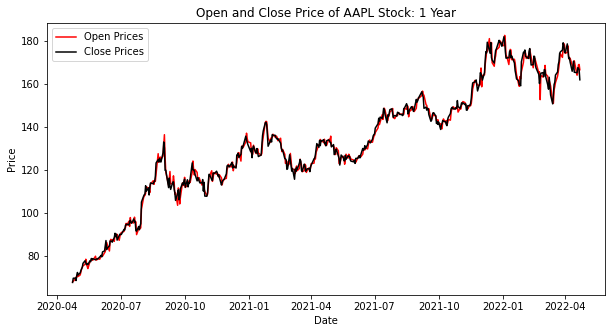

In [32]:
#Plotting Open and Closing Prices of AAPL Stock
plt.figure(figsize=(12, 5))
plt.title("Open and Close Price of AAPL Stock: 1 Year")
plt.plot(aapl_dataset['Open'], label='Open Prices', color = 'red')
plt.plot(aapl_dataset['Close'],label='Close Prices', color = 'black')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

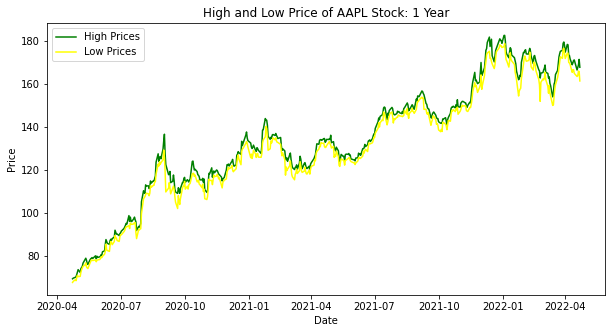

In [33]:
#Plotting High and Low Price Prices
plt.figure(figsize=(12, 5))
plt.title("High and Low Price of AAPL Stock: 1 Year")
plt.plot(aapl_dataset['High'], label='High Prices', color = 'green')
plt.plot(aapl_dataset['Low'], label='Low Prices', color = 'yellow')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

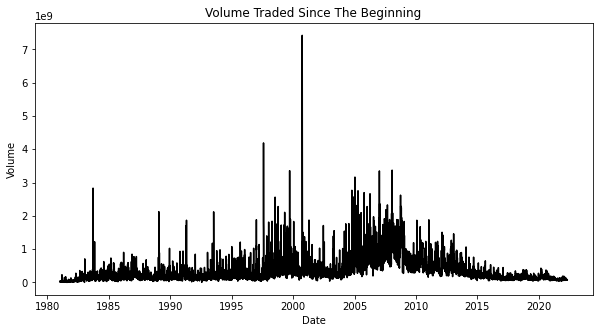

In [34]:
#Plotting Total Volume of HSBC being traded
plt.figure(figsize=(12, 5))
plt.title("Volume Traded Since The Beginning")
plt.plot(dataset['Volume'], 'black')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


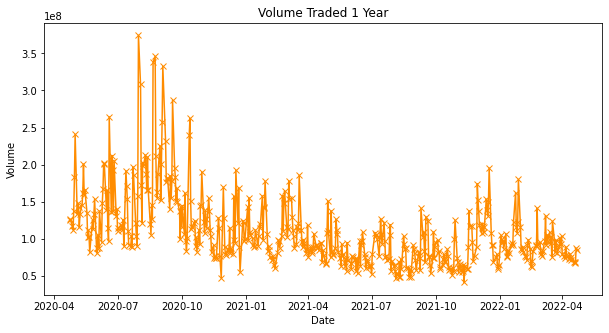

In [53]:
#Plotting Total Volume of HSBC being traded
plt.figure(figsize=(10, 5))
plt.title("Volume Traded 1 Year")
plt.plot(aapl_dataset['Volume'], 'darkorange', linestyle='-', marker='x')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


Text(0, 0.5, 'Returns')

<Figure size 720x360 with 0 Axes>

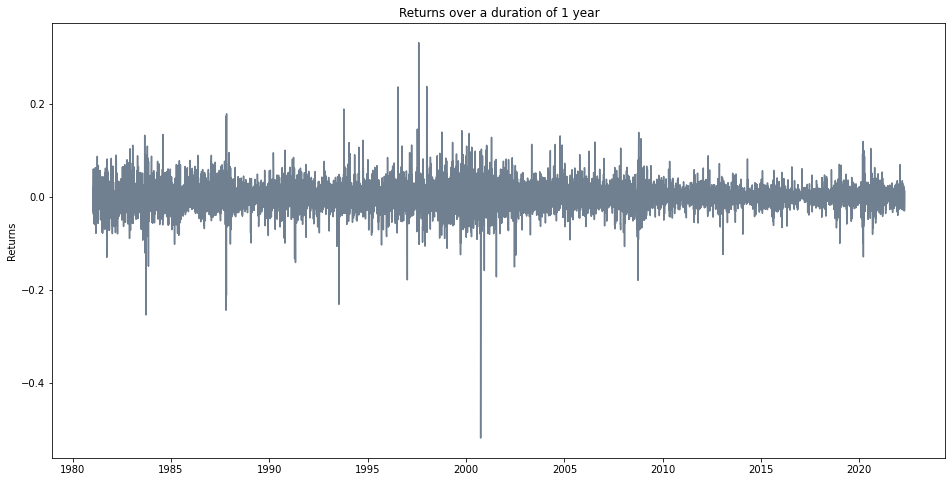

In [49]:
#Plotting Returns Since The Beginning
plt.figure(figsize=(10, 5))
prices = dataset.Close
returns = prices.pct_change()
plt.plot(returns, 'slategray')
plt.title("Returns over a duration of 1 year")
plt.ylabel('Returns')

Text(0, 0.5, 'Returns')

<Figure size 720x360 with 0 Axes>

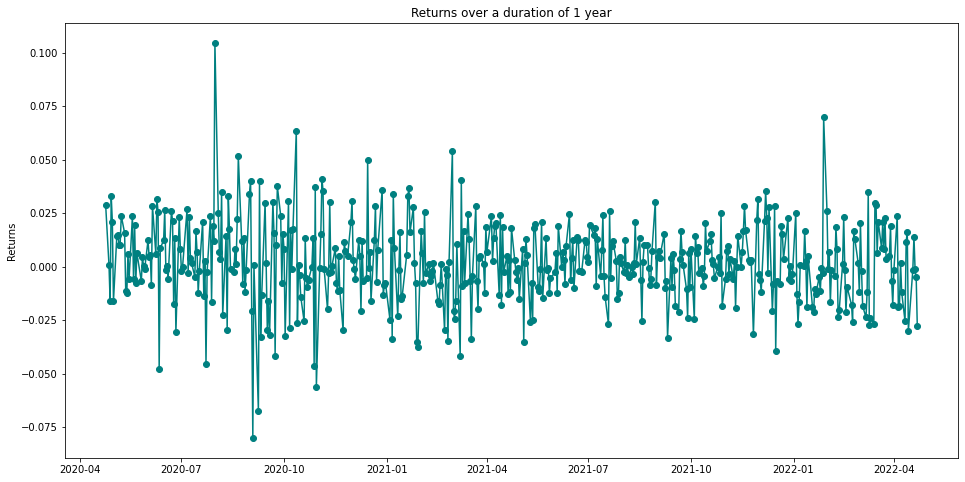

In [47]:
#Plotting Returns over a year
plt.figure(figsize=(10, 5))
prices = aapl_dataset.Close
returns = prices.pct_change()
plt.plot(returns, 'teal', linestyle='-', marker='o')
plt.title("Returns over a duration of 1 year")
plt.ylabel('Returns')

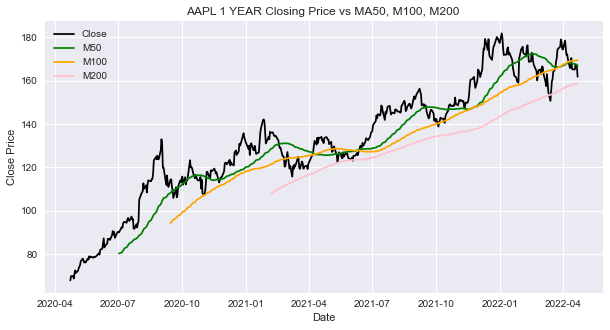

In [55]:
#Moving Average of 50 Days, 100 Days and 200 days

moving_average_50 = aapl_dataset.Close.rolling(50).mean()
moving_average_100 = aapl_dataset.Close.rolling(100).mean()
moving_average_200 = aapl_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(10, 5))
plt.title("AAPL 1 YEAR Closing Price vs MA50, M100, M200 ")
plt.plot(aapl_dataset['Close'], label='Close', color='black')
plt.plot(moving_average_50, label='M50', color='green')
plt.plot(moving_average_100, label='M100', color='orange')
plt.plot(moving_average_200, label='M200', color='pink')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Data Preprocesing